# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [1]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [2]:
print(data['train']['pos'][2])

I recently purchassed the very underrated Dreamcast and went off into town to find some games to use them on. I bought Soul Calibur (A classic) and then i stepped across the domain of Resident Evil Code Veronica. I have Resident Evil 1 & 2, and have played Res Evil 3 numerous occasions, and i have been impressed with all of them, especially no.1 which has to go down in history has a classic.<br /><br />But none of them 3 come anywhere near to the dreamcast attempt of Brilliant Gory Gameplay. If its just for the sake of buying a dreamcast for this game it is worth every moment of your time and effort, ive never been so enthralled over a computer game in the way this has enthralled me.<br /><br />Anyway, the story carrys on from the 2nd story in which Claire Redfield searches for her Brother (Chris - from the 1st story), who is presumed missing under the conspiracy of the dreaded umbrella corporation. Little is known about this corporation except the fact that you though you destroyed th

And one with a negative sentiment:

In [3]:
print(data['train']['neg'][2])

That song keeps humming in my head. Not the greatest song, but it's the 80's. This movie is about a lead singer who "supposebly" gets killed while being accused of murders as he stalks his girlfriend who sings backup vocals in his band. The lead singer whos name is Billy "Eye" (yeah, right) is dead after two years and his band comes back for a concert only the backup vocalist is the lead singer this time. Billy stalks her and eventually goes around killing all these people and terrifying the girl and makeing people around her think theres something wrong with her and that shes imagining things. She finally decides to go to a cemetary and dig up his grave to see if he's still there. She sees that he's dead but still see's and hears his voice. During the end of the movie we find out the reason behind all of this, Billy has a brother named John (right again) and John admits that he was jealous of his brother and that he killed all those people to get back at him and place the blame on his

We can also make a wordcloud visualization of the reviews.

This movie is an abomination, and its making should have been considered a capital crime.<br /><br />One of the great mysteries of film-making is why nobody ever has made a faithful movie adaptation of this wonderful mystery. It is a tale of a really gripping mystery, nice old-fashioned romance, and


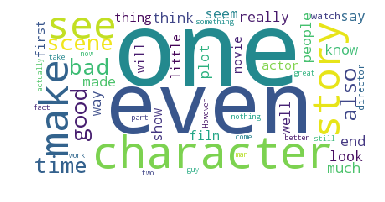

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])
print(combined_text[:300])
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [3]:
from sklearn.utils import shuffle
def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels

    # Combine all reviews for the desired sentiment
    data_train = [(review,"neg") for review in data['train']["neg"]] + [(review,"pos") for review in data['train']["pos"]]
    data_test = [(review,"neg") for review in data['test']["neg"]] + [(review,"pos") for review in data['test']["pos"]]
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    shuffle_train = shuffle(data_train)
    shuffle_test = shuffle(data_test)
    
    
    data_train = [shuffle_train[r][0] for r in range(len(shuffle_train))]
    labels_train = [shuffle_train[r][1] for r in range(len(shuffle_train))]
    data_test = [shuffle_test[r][0]for r in range(len(shuffle_test))]
    labels_test = [shuffle_test[r][1]for r in range(len(shuffle_test))]
    # Return a unified training data, test data, training labels, test labets
    print(labels_train)
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

['neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos'

## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [4]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/spiros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem

    # Return final list of words
    
    soup = BeautifulSoup(review, "html5lib")
    words = word_tokenize(soup.get_text())
    stop = set(stopwords.words('english'))
    wordsFiltered = []
    words = [PorterStemmer().stem(w) for w in words]
    for w in words:
        if w not in stop:
            wordsFiltered.append(w)    
    return wordsFiltered

review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['thi',
 'test',
 '.',
 'wa',
 "n't",
 'test',
 ',',
 'would',
 'make',
 'great',
 'movi',
 'review',
 '!']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [6]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
This is a great adaptation and a great miniseries in its own right. The plot cutdowns might disappoint the fans of the book (but really how many modern readers have read Bleak House without seeing a film version first? I know of only a few). <br /><br />I think it is quite appalling to see reviews critical of the series which have clearly been written by people who haven't a clue about the story - did you actually SEE the series or did you just bag a BBC production because Gillian Anderson was in the newer version?<br /><br />The series captures the mood, pace, characters and plot-drivers (cutting out the Dickensian flourishes which aren't needed and detract from a film treatment like the Turveydrop story, the Smallweed family dynamic and the extra lawyers - Tangle, Vholes etc are very truncated). The only omission that I wish had been kept was the Jellyby incident but as the first episode is already a tr

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer(max_features=vocabulary_size,preprocessor=lambda x: x,tokenizer=lambda x: x)
        features_train = vectorizer.fit_transform(words_train).toarray()

        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.fit_transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['albert', 'ride', 'caught', 'lyric', 'revers', 'tale', 'segal', 'truli']

--- Preprocessed words ---
['first', ',', 'I', 'think', 'comment', 'unworthi', 'site', 'like', 'thi', '.', 'obvious', 'tast', "n't", 'respect', 'tast', '.', 'give', 'histori', 'lesson', 'I', 'think', 'need', 'done', '.', 'black', 'actor', ',', ',', 'success', '.', 'If', 'part', '``', 'black', "''", 'race', 'understand', 'qualiti', ',', 'creativ', ',', 'vibrant', 'old', 'movi', '``', 'sparkl', "''", '``', 'mahogani', "''", '``', 'cooley', 'high', '.', "''", 'sinc', 'unfortun', 'black', ',', 'pleasur', 'feel', 'feel', 'watch', 'classic', ',', 'therefor', 'need', 'keep', 'freak', 'mouth', 'shut', 'stick', 'non-danc', 'race', '.', 'thank', '.']

--- Bag-of-Words features ---
[0 0 0 ..., 0 0 0]

--- Label ---
pos


Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

5000


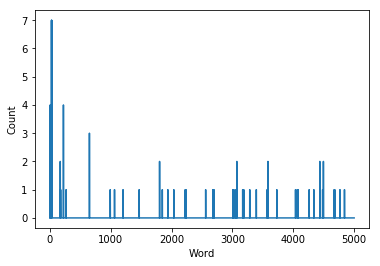

In [8]:
# Plot the BoW feature vector for a training document
print(len(features_train[0]))
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

In [9]:
f = []
for feature in features_train:
    perc = len([i for i in feature if i != 0])/len(feature)
    f.append(perc)    
(1 - np.average(f))*100

98.090658399999995

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

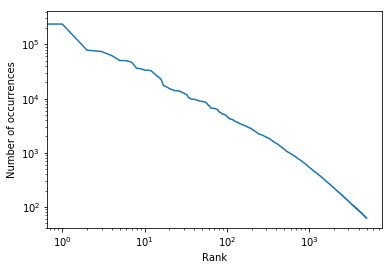

In [10]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer: 
It doesn't follow exactly the Zipf's law as it seems but I think it follows it approximately. For example the 1st most frequent occurs approximately 3 times as the third so perhaps there's a pattern.

In [11]:
for i in range(30):
    print("#"+str(i+1)+" most frequent word: "+str(sorted_word_freq[i]))

#1 most frequent word: 275883
#2 most frequent word: 236528
#3 most frequent word: 78013
#4 most frequent word: 73696
#5 most frequent word: 61971
#6 most frequent word: 50358
#7 most frequent word: 49940
#8 most frequent word: 46600
#9 most frequent word: 36174
#10 most frequent word: 35397
#11 most frequent word: 33377
#12 most frequent word: 33296
#13 most frequent word: 32626
#14 most frequent word: 29242
#15 most frequent word: 26472
#16 most frequent word: 24560
#17 most frequent word: 22157
#18 most frequent word: 17191
#19 most frequent word: 16821
#20 most frequent word: 16086
#21 most frequent word: 15215
#22 most frequent word: 14798
#23 most frequent word: 14508
#24 most frequent word: 14028
#25 most frequent word: 13972
#26 most frequent word: 13856
#27 most frequent word: 13823
#28 most frequent word: 13591
#29 most frequent word: 13372
#30 most frequent word: 12692


### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [13]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set
features_train = pr.normalize(features_train)
features_test = pr.normalize(features_train)

## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [14]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf1 = GaussianNB().fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.82376, test = 0.49976


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 3

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # TODO: Classify the data using GradientBoostingClassifier
    clf.fit(X_train, y_train)
    # TODO(optional): Perform hyperparameter tuning / model selection
        
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)
# TODO: Print final training & test accuracy
print("[{}] Accuracy: train = {}, test = {}".format(
    clf2.__class__.__name__,
    clf2.score(features_train, labels_train),
    clf2.score(features_test, labels_test)))


[GradientBoostingClassifier] Accuracy: train = 0.6808, test = 0.50128


### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [16]:
# TODO: Write a sample review and set its true sentiment
my_review = "This movie is the worst ever invented. But I love it. Not."
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = review_to_words(my_review)
vectorizer = CountVectorizer(vocabulary=vocabulary,preprocessor=lambda x: x,tokenizer=lambda x: x)
vector = vectorizer.transform(words).toarray()
vector = pr.normalize(vector)


# TODO: Then call your classifier to label it
clf1.predict(vector)[-1]

'neg'

## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [17]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Using TensorFlow backend.


Loaded dataset with 25000 training samples, 25000 test samples


In [18]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[7])
print("--- Label ---")
print(y_train[7])

--- Review ---
[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 2, 2343, 4804, 2, 2, 2, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 2, 37, 9, 150, 4, 2, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 2, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 2, 799, 2, 2, 588, 84, 11, 4, 3231, 152, 339, 2, 42, 4869, 2, 2, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 2, 2, 17, 4, 2, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 2, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 2, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 2, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 2, 61, 602, 120, 45, 2, 6, 320, 786, 99, 196, 2, 786, 2, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 3231, 45, 853, 2029, 8, 30, 6, 117, 430

Notice that the label is an integer (0 for negative, 1 for positive), and the review itself is stored as a sequence of integers. These are word IDs that have been preassigned to individual words. To map them back to the original words, you can use the dictionary returned by `imdb.get_word_index()`.

In [19]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[7]])
print("--- Label ---")
print(y_train[7])

1515520/1641221 [==========================>...] - ETA: 0s--- Review (with words) ---
['the', 'of', 'and', 'local', 'of', 'their', 'br', 'of', 'attention', 'widow', 'and', 'captures', 'parties', 'and', 'and', 'and', 'and', 'excitement', 'and', 'and', 'and', 'and', 'of', 'and', 'english', 'and', 'like', 'it', 'years', 'of', 'and', 'unintentional', 'this', 'hitchcock', 'of', 'and', 'learn', 'everyone', 'is', 'quite', 'and', 'it', 'and', 'such', 'it', 'bonus', 'film', 'of', 'too', 'seems', 'he', 'of', 'enough', 'for', 'be', 'and', 'editing', 'and', 'and', 'please', 'great', 'this', 'of', 'shoots', 'thing', '3', 'and', "it's", 'mentioning', 'and', 'and', 'given', 'parties', 'and', 'back', 'out', 'interesting', 'times', 'no', 'all', 'average', 'talking', 'some', 'of', 'nor', 'seems', 'into', 'best', 'at', 'of', 'every', 'cast', 'i', 'i', 'inside', 'keep', 'inside', 'large', 'viewer', 'who', 'obscure', 'and', 'and', 'and', 'movie', 'of', 'and', 'entirely', "you've", 'see', 'because', 'you', 

Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:

In [24]:
lengths = [len(x) for x in X_train]
print("Max review Length: {}".format(max(lengths)))
print("Min review Length: {}".format(min(lengths)))

Max review Length: 2494
Min review Length: 11


### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [29]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train,maxlen=max_words,padding='post')
X_test = sequence.pad_sequences(X_test,maxlen=max_words,padding='post')

### TODO: Design an RNN model for sentiment analysis

Build your model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that your input is a sequence of words (technically, integer word IDs) of maximum length = `max_words`, and your output is a binary sentiment label (0 or 1).

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# TODO: Design your model

model = Sequential()
model.add(Embedding(input_dim = vocabulary_size, output_dim = 128,input_length = max_words))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________
None


#### Question: Architecture and parameters

Briefly describe your neural net architecture. How many model parameters does it have that need to be trained?

#### Answer:
Total parameters: 771,713

Starts with an embedding layer that takes as input the vocabulary size (5000) and ouputs 128. Then there's the LSTM layer and lastly the dense layer (sigmoid) that will output the category (pos or neg).

### TODO: Train and evaluate your model

Now you are ready to train your model. In Keras world, you first need to _compile_ your model by specifying the loss function and optimizer you want to use while training, as well as any evaluation metrics you'd like to measure. Specify the approprate parameters, including at least one metric `'accuracy'`.

In [41]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Once compiled, you can kick off the training process. There are two important training parameters that you have to specify - **batch size** and **number of training epochs**, which together with your model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a hike! If possible, consider using a GPU, as a single training run can take several hours on a CPU.

> **Tip**: You can split off a small portion of the training set to be used for validation during training. This will help monitor the training process and identify potential overfitting. You can supply a validation set to `model.fit()` using its `validation_data` parameter, or just specify `validation_split` - a fraction of the training data for Keras to set aside for this purpose (typically 5-10%). Validation metrics are evaluated once at the end of each epoch.

In [42]:
# TODO: Specify training parameters: batch size and number of epochs
batch_size = 32
num_epochs = 15

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)

# TODO: Train your model
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_data=(X_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 340s - loss: 0.6967 - acc: 0.5020 - val_loss: 0.6932 - val_acc: 0.5015
Epoch 2/15
25000/25000 [==============================] - 336s - loss: 0.6924 - acc: 0.5087 - val_loss: 0.6921 - val_acc: 0.5038
Epoch 3/15
25000/25000 [==============================] - 328s - loss: 0.6783 - acc: 0.5264 - val_loss: 0.6916 - val_acc: 0.5136
Epoch 4/15
25000/25000 [==============================] - 327s - loss: 0.6628 - acc: 0.5321 - val_loss: 0.6897 - val_acc: 0.5116
Epoch 5/15
25000/25000 [==============================] - 327s - loss: 0.4986 - acc: 0.7589 - val_loss: 0.3704 - val_acc: 0.8577
Epoch 6/15
25000/25000 [==============================] - 326s - loss: 0.2936 - acc: 0.8872 - val_loss: 0.3096 - val_acc: 0.8764
Epoch 7/15
25000/25000 [==============================] - 326s - loss: 0.2270 - acc: 0.9151 - val_loss: 0.3014 - val_acc: 0.8781
Epoch 8/15
25000/25000 [==============

In [43]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "rnn_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

Once you have trained your model, it's time to see how well it performs on unseen test data.

In [44]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.87396


#### Question: Comparing RNNs and Traditional Methods

How well does your RNN model perform compared to the BoW + Gradient-Boosted Decision Trees?

#### Answer:

Much better. The non-deep learning methods gave almost a random result (~50%)

## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!